<a href="https://colab.research.google.com/github/UgurUysal86/My-ML-Notebooks/blob/main/classification-structured-data/ex-2/20240810_Training_a_classification_model_on_the_Auto_MPG_dataset_to_predict_the_origin_of_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Ugur Uysal](https://github.com/UgurUysal86) - ugur.uysal.86@gmail.com - 10. AUG 2024
## Training a classification model on the Auto MPG dataset to predict the origin of cars.

* This notebook demonstrates the process of training a neural network-based regression model utilizing tensorflow.keras on the Auto MPG dataset to predict the origin of cars ['Europe', 'Japan', 'USA'].

* Portions of this notebook are modifications based on work created and shared by Google (https://www.tensorflow.org/tutorials/keras/regression) and code samples are used according the Apache 2.0 License.


# 0. Preparing the colab environment

## 0.1. Imports and settings
The code below sets up libraries for TensorFlow, visualization, and data manipulation in Python. It’s a common starting point for machine learning and data science projects.

In [1]:
import tensorflow as tf
print("Using Tensorflow Version", tf.__version__, "\n")
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
import seaborn as sns

Using Tensorflow Version 2.17.0 



# 1. Downloading, preprocessing and analyzing the dataset

## 1.1 Downloading the dataset and saving it in a Pandas Dataframe

The code below loads a the auto-mpg dataset from a URL, clean it by removing missing values, map numeric country codes to country names, and perform one-hot encoding for further analysis. Specifically, it prepares the data for machine learning or statistical tasks related to automotive attributes.

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
dataset = dataset.dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})  # One Hot encoding the labels
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset = dataset.replace({True: 1, False: 0})
print ("Dataset successfully loaded and saved as a dataframe")
dataset.tail()

Dataset successfully loaded and saved as a dataframe


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


## 1.2. Analysing the Dataset

### 1.2.1 Overview
The given dataset contains information about various car features, including MPG (fuel efficiency), cylinders, displacement, horsepower, weight, acceleration, model year, and binary indicators for the car’s origin (Europe, Japan, and USA)

The following code defines a function called analysis that takes a Pandas DataFrame as an input and prints out various summary statistics about the data. The function prints the data types of each column, the number of rows and columns, the index range, the column names, the number of null values in each column, the mean value of each column, and the standard deviation of each column.

In [3]:
def analysis(df):
    print("Data Types:")
    print(df.dtypes)
    print("\nNumber of Rows and Columns:")
    print(df.shape)
    print("\nColumn Names:")
    print(df.columns)
    print("\nNumber of Null Values:")
    print(df.isnull().sum())
    print("\nMean Value:")
    print(df.mean())
    print("\nStd Deviation:")
    print(df.std())
analysis(dataset)

Data Types:
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Europe            int64
Japan             int64
USA               int64
dtype: object

Number of Rows and Columns:
(392, 10)

Column Names:
Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')

Number of Null Values:
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Europe          0
Japan           0
USA             0
dtype: int64

Mean Value:
MPG               23.445918
Cylinders          5.471939
Displacement     194.411990
Horsepower       104.469388
Weight          2977.584184
Acceleration      15.541327
Model Year        75.979592
Europe             0.173469
Japan              0.201531
USA                0.625000
dtype: float64

S

### 1.2.2 Correlation matrix
The code below computes the correlation matrix of the dataset regarding the features 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', and 'Origin'.

In [4]:
corrMatrix = dataset.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454,-0.565161
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209,0.610494
Displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825,0.655936
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936,0.489625
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929,0.600978
Acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020,-0.258224
Model Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841,-0.136065
Europe,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157,-0.591434
Japan,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000,-0.648583
USA,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.591434,-0.648583,1.000000


Here is an interpretation of the correlation matrix for all the features:

* MPG (Miles Per Gallon):
MPG has a strong negative correlation with “Cylinders” (-0.78), “Displacement” (-0.81), “Horsepower” (-0.78), and “Weight” (-0.83).
This means that as the number of cylinders, engine displacement, horsepower, or weight increases, MPG tends to decrease.

* Cylinders have a strong positive correlation with “Displacement” (0.95) and “Horsepower” (0.84).
More cylinders typically correspond to larger engine displacement and higher horsepower.

* Displacement has a strong positive correlation with “Cylinders” (0.95) and “Horsepower” (0.90).
Larger engine displacement usually leads to higher horsepower.

* Horsepower has a strong positive correlation with “Cylinders” (0.84) and “Displacement” (0.90).
Higher horsepower engines tend to have more cylinders and larger displacement.

* Weight has a strong negative correlation with “MPG” (-0.83).
Heavier cars generally have lower fuel efficiency (MPG).

* Acceleration has a moderate positive correlation with “MPG” (0.42) and a weak negative correlation with “Weight” (-0.42). Faster acceleration is associated with better MPG, while heavier cars tend to accelerate more slowly.

* Model Year:
Model Year has a positive correlation with “MPG” (0.58).
Newer model years tend to have better fuel efficiency.

* Europe, Japan, and USA:
These binary variables represent the car’s origin (Europe, Japan, or USA).
“Europe” has a positive correlation with “MPG” (0.24), while “USA” has a negative correlation (-0.57). Cars from Europe tend to have better MPG, while those from the USA have lower MPG.

Based on the correlation matrix above, the features with low correlations to origin (Model Year) will be dropt in the dataset.

## 1.3 Spliting the data into training and test sets

The code below splits the dataset into training and test subsets for machine learning tasks:

Data Splitting:
train_data contains 80% of the original dataset, randomly sampled.
test_data includes the remaining 20% by excluding the rows present in train_data.
Feature and Label Separation:
train_x and test_x are copies of the features (input variables) from the training and test data, respectively.
train_y and test_y store the corresponding labels (target variable, in this case, ‘MPG’).

In [5]:
train_data = dataset.sample(frac=0.8, random_state=1)
test_data = dataset.drop(train_data.index)

feature_names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration']
train_x = train_data.filter(feature_names)
test_x = test_data.filter(feature_names)

target_names = ['Europe', 'Japan', 'USA']
train_y = train_data.filter(target_names)
test_y = test_data.filter(target_names)

print('train_x.shape', train_x.shape)
print('train_y.shape', train_y.shape)
print('test_x.shape', test_x.shape)
print('test_y.shape', test_y.shape)

print('\n' + "features (x) sample:"+ '\n', train_x.iloc[0])
print('\n' + "targets (y) sample:" + '\n', train_y.iloc[0])

train_x.shape (314, 6)
train_y.shape (314, 3)
test_x.shape (78, 6)
test_y.shape (78, 3)

features (x) sample:
 MPG               23.0
Cylinders          4.0
Displacement     120.0
Horsepower        97.0
Weight          2506.0
Acceleration      14.5
Name: 82, dtype: float64

targets (y) sample:
 Europe    0
Japan     1
USA       0
Name: 82, dtype: int64


## 1.4. Feature-wise normalization of the dataset

The purpose of the code below is to normalize the features in the training and test datasets:

mean = train_x.mean(axis=0): Calculates the mean (average) of each feature along the rows (axis 0) in the training data.
train_x -= mean: Subtracts the mean from each feature in the training data, centering the distribution around zero.
std = train_x.std(axis=0): Computes the standard deviation of each feature in the training data.
train_x /= std: Divides each feature by its standard deviation, scaling the features to have unit variance.
The same normalization process is then applied to the test data (test_x). Finally, the code prints the shapes of the normalized training and test data, along with a sample feature row from the training data and its corresponding label.

In [6]:
mean = train_x.mean(axis=0)
train_x -= mean
std = train_x.std(axis=0)
train_x /= std

test_x -= mean
test_x /= std

print("train_data shape:", train_x.shape)
print("test_data shape:", test_x.shape)
print('\n' + "features sample:" + '\n', train_x.iloc[313])
print('\n' + "Label sample:" + '\n', train_y.iloc[313])

train_data shape: (314, 6)
test_data shape: (78, 6)

features sample:
 MPG            -0.192683
Cylinders       0.299093
Displacement    0.517974
Horsepower      0.023372
Weight          0.450760
Acceleration   -0.360729
Name: 192, dtype: float64

Label sample:
 Europe    0
Japan     0
USA       1
Name: 192, dtype: int64


# 2. Training a baseline model
Starting with a simple baseline model provides a point of reference for evaluating the more complex model which will be trained in the following section. The baseline model helps to identify issues early on, and ensures that added complexity is justified by an improvement in performance.

## 2.1 Training a k-nearest neighbors classifier and predicting labels of the testset

The following code uses a k-nearest neighbors (K-NN) classifier from the scikit-learn library to train a model and make predictions on the test set. The code is iterating over a range of values for the n_neighbors parameter, which specifies the number of nearest neighbors to include in the majority voting process. For each value of n_neighbors, a KNeighborsClassifier object is created and trained on the training data train_x and train_y. Then, the classifier is used to predict the labels for the test data test_x. The accuracy of the predictions is calculated by comparing the predicted labels to the true labels test_y using the accuracy_score function. Finally, the accuracy score for each value of n_neighbors is printed.

In [7]:
# Finding the best value for n_neighbors to train the k-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,11):
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(train_x, train_y)
  predicted_labels = classifier.predict(test_x)
  score = accuracy_score(test_y, predicted_labels)
  print('The Accuracy_score of the KNeighborsClassifier for n_neighbors =', i, 'is', score)

The Accuracy_score of the KNeighborsClassifier for n_neighbors = 1 is 0.7435897435897436
The Accuracy_score of the KNeighborsClassifier for n_neighbors = 2 is 0.6410256410256411
The Accuracy_score of the KNeighborsClassifier for n_neighbors = 3 is 0.7307692307692307
The Accuracy_score of the KNeighborsClassifier for n_neighbors = 4 is 0.6282051282051282
The Accuracy_score of the KNeighborsClassifier for n_neighbors = 5 is 0.6666666666666666
The Accuracy_score of the KNeighborsClassifier for n_neighbors = 6 is 0.6025641025641025
The Accuracy_score of the KNeighborsClassifier for n_neighbors = 7 is 0.6666666666666666
The Accuracy_score of the KNeighborsClassifier for n_neighbors = 8 is 0.6410256410256411
The Accuracy_score of the KNeighborsClassifier for n_neighbors = 9 is 0.717948717948718
The Accuracy_score of the KNeighborsClassifier for n_neighbors = 10 is 0.6794871794871795


In [8]:
# Using the best value for n_neighbors to train the k-nearest neighbors classifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(train_x, train_y)
predicted_labels = classifier.predict(test_x)
print('The Accuracy_score of the KNeighborsClassifier is', accuracy_score(test_y, predicted_labels))

The Accuracy_score of the KNeighborsClassifier is 0.7435897435897436


# 3. Training a model (neural network) using TensorFlow & Keras (Deep Learning)

## 3.1 Building the model

The code below creates a Sequential neural network model using Keras (a high-level neural networks API) with the following characteristics:

Model Architecture:
The model consists of three layers:
The first layer is a Dense layer with 64 units and a ReLU activation function.
The second layer is another Dense layer with 64 units and a ReLU activation function.
The third layer is a Dense layer with a single output unit (for regression tasks).
The input shape for the first layer is determined by the number of features in the training data (train_x.shape[1]).
Compilation:
The model is compiled using the RMSprop optimizer with a learning rate of 0.0001.
The loss function used during training is the mean squared error (MSE).
The model’s performance is evaluated using the mean absolute error (MAE) metric.
Summary:
The model.summary() call displays a summary of the model architecture, including the layer types, output shapes, and trainable parameters.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,771 (503.01 KB)

 Trainable params: 127,107 (496.51 KB)

 Non-trainable params: 1,664 (6.50 KB)

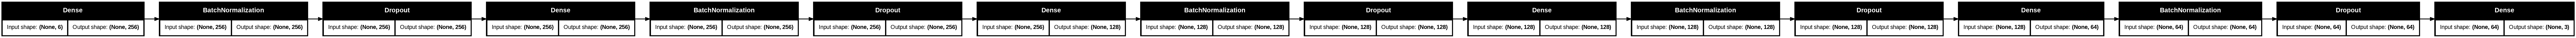

In [175]:
tf.keras.backend.clear_session() # clearing the session from previous models and layers

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(train_x.shape[1],))) # train_x.shape[1] == 6 since train_x.shape == 6 features
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(train_y.shape[1],  activation=tf.nn.softmax))  # train_x.shape[1] == 3 targets

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.00005), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

#plotting the model
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## 3.2 Training the model

The purpose of the provided code is to train a neural network model (model) using the training features (train_x) and corresponding labels (train_y). Here are the key steps:

Training Configuration:
EPOCHS = 1000: Specifies the maximum number of training epochs (iterations).
early_stop: Sets up early stopping based on validation loss. If the validation loss doesn’t improve for a certain number of epochs (patience), training stops early.
Model Training:
model.fit(...): Trains the model using the training data (train_x, train_y).
It monitors the validation loss during training and stops early if necessary.
The batch size is set to 16, and progress updates are displayed (verbose=2)

In [176]:
# Defining Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=1, mode='auto', baseline=None, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=24, verbose=1)

history = model.fit(train_x, train_y, epochs=1000, validation_split = 0.1, batch_size=16, verbose=1, callbacks=[early_stop, reduce_lr])

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.3464 - loss: 1.4315 - val_accuracy: 0.1875 - val_loss: 1.1013 - learning_rate: 5.0000e-05
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4414 - loss: 1.1655 - val_accuracy: 0.1875 - val_loss: 1.1071 - learning_rate: 5.0000e-05
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5343 - loss: 1.0845 - val_accuracy: 0.1875 - val_loss: 1.1075 - learning_rate: 5.0000e-05
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5584 - loss: 1.1158 - val_accuracy: 0.2188 - val_loss: 1.1043 - learning_rate: 5.0000e-05
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5376 - loss: 1.0304 - val_accuracy: 0.2500 - val_loss: 1.1054 - learning_rate: 5.0000e-05
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5128 - loss: 1.0487 - val_accuracy: 0.2812 - val_loss: 1.0984 - learning_rate: 5.0000e-05
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accurac

## 3.3 Plotting Training and Validation Metrics per Epoch

The following code uses the history object returned by the fit method to extract the training and validation accuracy, loss, recall, and false negatives for each epoch. It then uses the pyplot module from matplotlib to plot the training and validation accuracy, loss, and recall per epoch. Three separate plots are created, one for accuracy, one for loss, and one for recall.

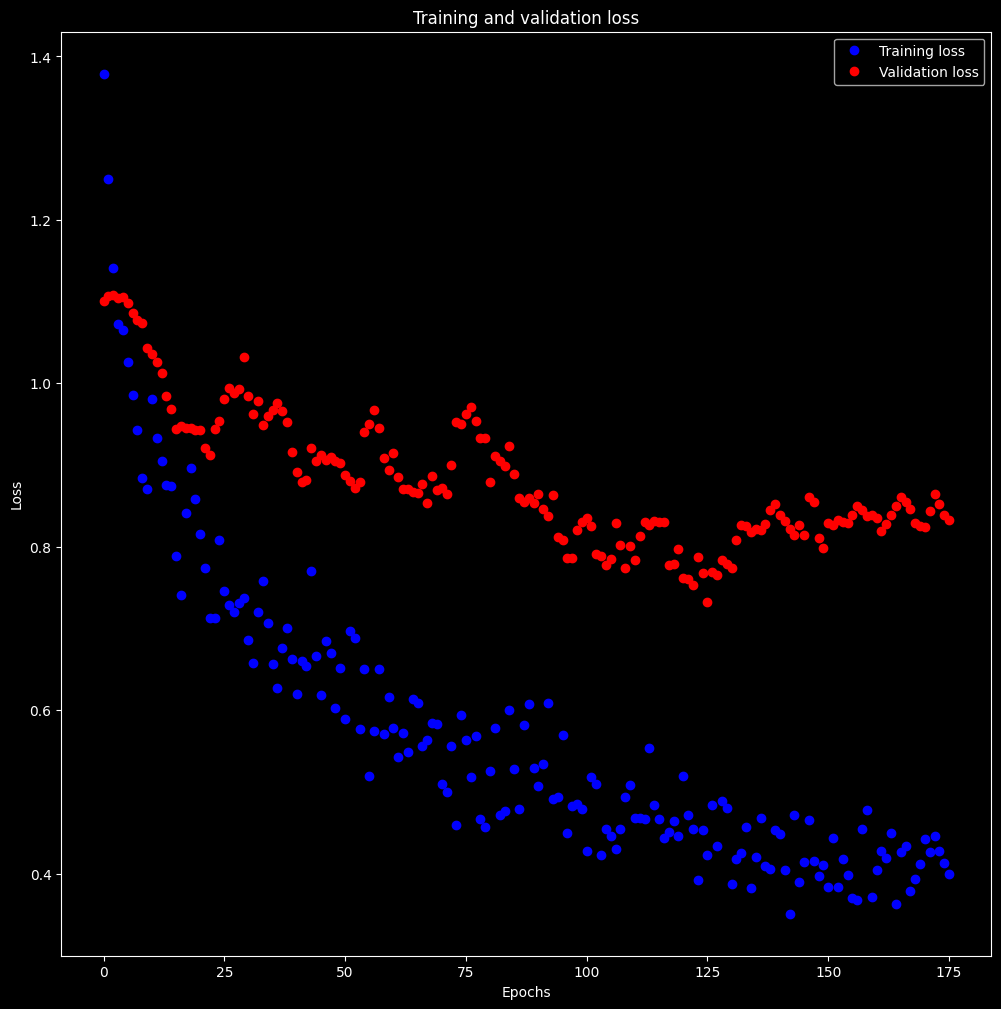

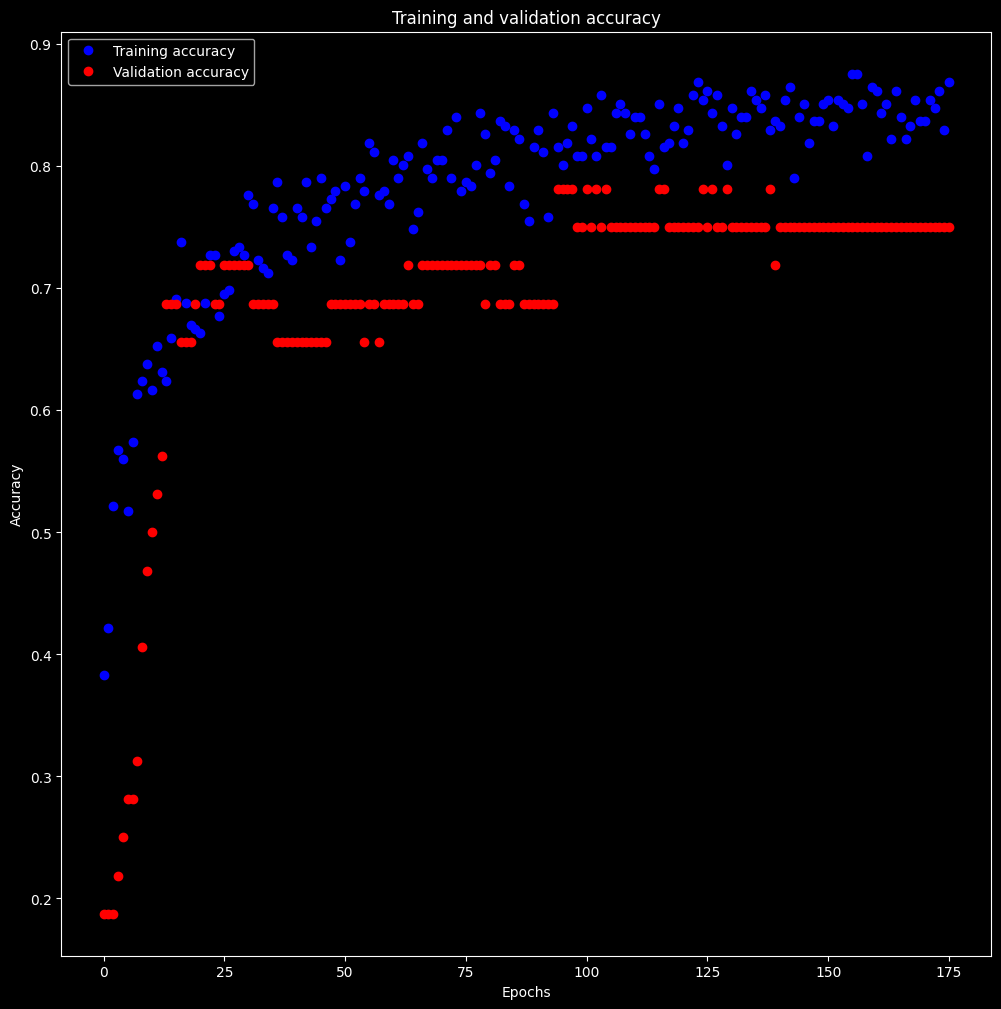

In [177]:
# Evaluating Accuracy and Loss for the Model
loss          = history.history['loss' ]
val_loss      = history.history['val_loss']
accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

epochs = range(len(accuracy)) # Get number of epochs

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy per epoch
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'ro', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3.4 Evaluating the performance of the trained model

The following code evaluates the performance of the trained classification model on the test data using various performance metrics.

In [178]:
loss, accuracy = model.evaluate(test_x, test_y, verbose=1)
print ('\n test loss:', loss, '\n test accuracy:', accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.8218 - loss: 0.6435

 test loss: 0.6890571713447571 
 test accuracy: 0.807692289352417


In [179]:
# predicting all labels of the test set
predicted_labels = model.predict(test_x)
predicted_labels_argmax = np.argmax(predicted_labels, axis=1)
print('predicted labels: \n', predicted_labels_argmax)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step
predicted labels: 
 [2 2 2 2 1 2 2 2 2 2 0 1 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 0 1 0 2 2 2 2 1
 0 1 1 0 2 1 2 1 1 1 1 1 2 2 2 1 2 1 0 2 2 2 2 2 0 1 2 2 2 2 1 2 2 2 1 1 2
 2 2 2 2]


In [180]:
test_y_argmax = np.argmax(test_y, axis=1)
print('true labels: \n', test_y_argmax)

true labels: 
 [2 2 2 2 0 2 2 2 2 2 0 0 2 2 2 2 2 0 1 2 2 2 1 2 0 2 1 2 2 0 1 2 2 2 2 2 0
 0 1 1 0 2 0 2 2 1 1 1 2 2 2 2 2 1 1 0 2 2 2 2 2 0 1 2 1 1 1 1 2 2 1 1 1 2
 2 2 2 2]


In [195]:
print('The Accuracy_score of the model is', accuracy_score(test_y_argmax, predicted_labels_argmax))

The Accuracy_score of the model is 0.8076923076923077



Confusion matrix


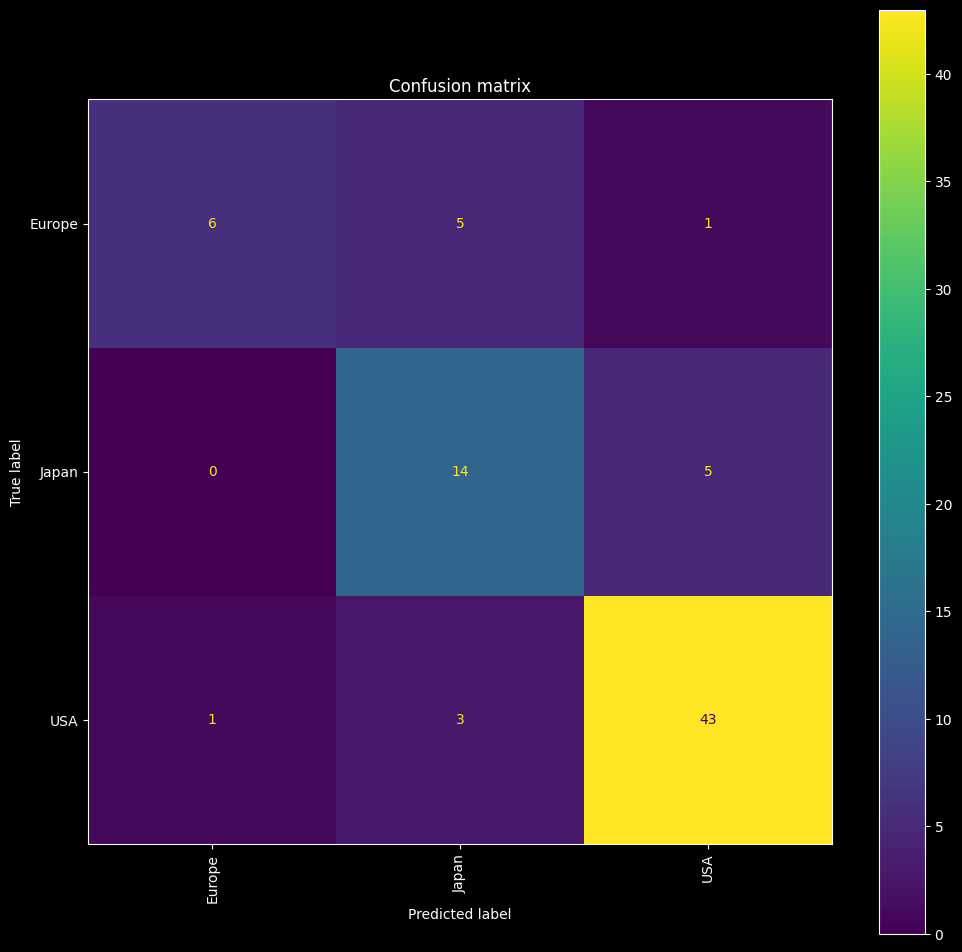

In [181]:
print('\nConfusion matrix')
plt.rcParams['figure.figsize'] = [12, 12]
ConfusionMatrixDisplay.from_predictions(test_y_argmax, predicted_labels_argmax, display_labels=target_names, xticks_rotation='vertical')
plt.title('Confusion matrix')
plt.show()

In [182]:
print('\nClassification Report')
print(classification_report(test_y_argmax, predicted_labels_argmax, target_names=target_names))


Classification Report
              precision    recall  f1-score   support

      Europe       0.86      0.50      0.63        12
       Japan       0.64      0.74      0.68        19
         USA       0.88      0.91      0.90        47

    accuracy                           0.81        78
   macro avg       0.79      0.72      0.74        78
weighted avg       0.82      0.81      0.80        78



## 3.5 Visualizing the performance of the final model with t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a machine learning algorithm used for visualizing high-dimensional data. It maps the high-dimensional data to a lower-dimensional space (usually 2D or 3D) in a way that preserves the pairwise distances between the data points. This allows for the visualization of clusters and patterns in the data that may not be apparent in the high-dimensional space.

The following code uses t-SNE (t-Distributed Stochastic Neighbor Embedding) to visualize high-dimensional data. It first extracts the output of the last layer of a trained model and uses it to create an activation_model. This model is then used to generate activations for the test data. The activations are then transformed using t-SNE and plotted as a scatter plot with different colors representing different classes. The class names are also added to the plot as text labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step
activations.shape= (78, 3)
calculating t-SNE ... this may take some minutes depending on the size of the test set
t-SNE calculation finished


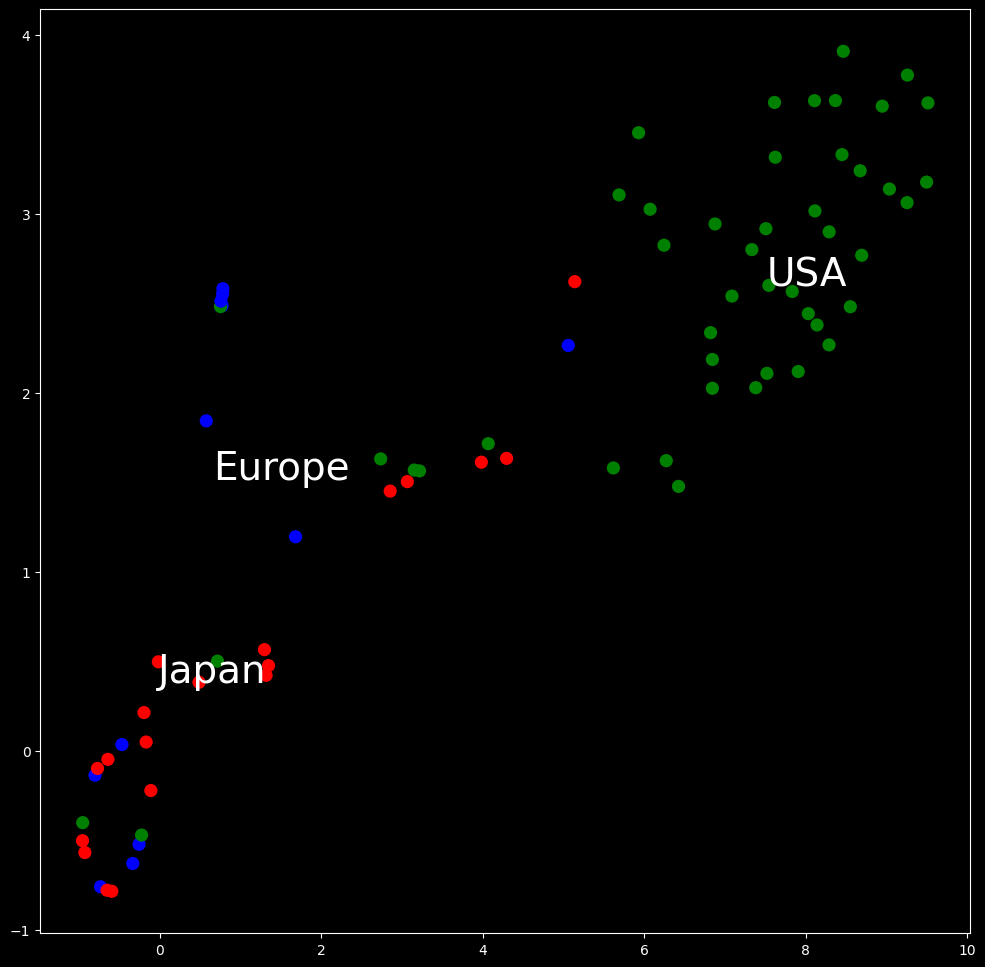

In [184]:
# t-SNE Visualization: t-Distributed Stochastic Neighbor Embedding (t-SNE) for visualizing high-dimensional data.
layer = model.get_layer(index=len(model.layers)-1) # get last layer by index, use model.get_layer('dense_1') to get last layer by string.
layer_output = layer.output
activation_model = tf.keras.models.Model(inputs=model.inputs, outputs=[layer_output])
activations = activation_model.predict(test_x)
print("activations.shape=", activations.shape)

print("calculating t-SNE ... this may take some minutes depending on the size of the test set")
tsne = TSNE(random_state=86).fit_transform(activations)
print("t-SNE calculation finished")

# creating a scatter plot.
num_classes = len(target_names)
palette = np.array(sns.color_palette(["Blue","Red",'green'] ,num_classes))  # manual selection of colors
label_array = np.asarray(test_y_argmax)

fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor('black')
plt.style.use('dark_background')
plt.scatter(tsne[:, 0], tsne[:, 1], lw=0, s=90, c=palette[label_array])
plt.axis('tight')

txts = []
for j in range(num_classes):
    # Position of each label at median of data points.
    xtext, ytext = np.median(tsne[label_array == j, :], axis=0)
    txt = plt.text(xtext, ytext, target_names[j], fontsize=28, color = 'w')
    txts.append(txt)
plt.show()

# 4. Using the trained model for new predictions

Provide input x data ('MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration') of new test vehicle here to predict the y value ('Origin:Europe/Japan/USA') with the trained model.


In [204]:
# New Car:
MPG           = 23.0
Cylinders     = 4.0
Displacement  = 120.0
Horsepower    = 97.0
Weight        = 2500.0
Acceleration  = 15.0

# vectorization
newData = np.array([MPG, Cylinders, Displacement, Horsepower, Weight, Acceleration])

# normalizing the new data - feature-wise normalization (substract mean of feature and divide by std deviation which was already calculated based on the training data)
newData-= mean
newData/= std

# Converts single inputs to a batch, since the model was trained on batch_size higher than 1.
newData = np.array([newData])

new_test_prediction = model.predict(newData)
pred = new_test_prediction[0]
print('[Europe, Japan, USA]' '\n', pred)

if np.argmax(pred) == 0:
  print('Europes origin with',  pred[0]*100, '% accuracy')
if np.argmax(pred) == 1:
  print('Japan as origin with', pred[1]*100, '% accuracy')
if np.argmax(pred) == 2:
  print('USA as origin with',   pred[2]*100,'% accuracy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[Europe, Japan, USA]
 [0.346 0.642 0.012]
Japan as origin with 64.21224474906921 % accuracy


## 5.  Exercise

Try to find a better model architecture and Hyperparameters to increase the accuracy of the model.

## References:
* TensorFlow: https://www.tensorflow.org/
* Tensorflow Basic regression: Predict fuel efficiency:https://www.tensorflow.org/tutorials/keras/regression
* Keras: https://keras.io/
* Chollet, F. (2018). Deep learning with Python. p. 85-91
* Quinlan,R.. (1993). Auto MPG. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/9/auto+mpg
* scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

## License:
Copyright (c) 2024 Ugur Uysal

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

## Thank you. Visit my personal GitHub page https://github.com/UgurUysal86 for more examples.